# practical ways to change data types and convert measurement units in pandas DataFrames. This skill is essential for cleaning real-world data, fixing mismatches, and preparing for analysis.



In [2]:
# Loading dataset
import warnings
warnings.filterwarnings('ignore')

# Data setup (Titanic Dataset)
import pandas as pd
import numpy as np

np.random.seed(42)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
print(df.shape)
print(df.head(3))

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [3]:
# check data types and missing values
print(df.shape)
print(df['Age'].isnull().sum())

(891, 12)
177


In [4]:
# Convert Age to integer (if possible)
df['Age_int'] = df['Age'].fillna(-1).astype(int)
print(df[['Age', 'Age_int']].head(8))

    Age  Age_int
0  22.0       22
1  38.0       38
2  26.0       26
3  35.0       35
4  35.0       35
5   NaN       -1
6  54.0       54
7   2.0        2


# When a column has limited unique values -- considering make them category for better analysis and faster memory optimization

In [5]:
# Convert 'Sex' column to a category for space and speed-Helps optimising memory
df['Sex_cat'] = df['Sex'].astype('category')
print(df['Sex_cat'].dtype)
print(df['Sex_cat'].head())

category
0      male
1    female
2    female
3    female
4      male
Name: Sex_cat, dtype: category
Categories (2, object): ['female', 'male']


In [6]:
# Convert 'Pclass' to category, since there are only 3 ticket classes
df['Pclass'] = df['Pclass'].astype('category')
print(df['Pclass'].dtype)
print(df['Pclass'].unique())

category
[3, 1, 2]
Categories (3, int64): [1, 2, 3]


# sting types helps to check and fill frequent missing values, str type is often safer than objects

In [7]:
# Convert 'Cabin' column to string type (new in pandas 1.0+)  
df['Cabin_str'] = df['Cabin'].astype('string')  
print(df['Cabin_str'].dtype)  
print(df[['Cabin', 'Cabin_str']].head(7))

string
  Cabin Cabin_str
0   NaN      <NA>
1   C85       C85
2   NaN      <NA>
3  C123      C123
4   NaN      <NA>
5   NaN      <NA>
6   E46       E46


In [8]:
# Convert 'Fare' from British pounds to US dollars (approximate, 1 GBP = 1.25 USD)  
df['Fare_usd'] = df['Fare'] * 1.25  
print(df[['Fare', 'Fare_usd']].head(7))

      Fare   Fare_usd
0   7.2500   9.062500
1  71.2833  89.104125
2   7.9250   9.906250
3  53.1000  66.375000
4   8.0500  10.062500
5   8.4583  10.572875
6  51.8625  64.828125


In [9]:
# Convert 'Age' from years to months (super easy!)
df['Age_months'] = df['Age'] * 12
print(df[['Age', 'Age_months']].head(10))

    Age  Age_months
0  22.0       264.0
1  38.0       456.0
2  26.0       312.0
3  35.0       420.0
4  35.0       420.0
5   NaN         NaN
6  54.0       648.0
7   2.0        24.0
8  27.0       324.0
9  14.0       168.0


In [10]:
# Convert 'Name' to uppercase (string operation)
df['Name_up'] = df['Name'].str.upper()
print(df[['Name','Name_up']].head())

                                                Name  \
0                            Braund, Mr. Owen Harris   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2                             Heikkinen, Miss. Laina   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4                           Allen, Mr. William Henry   

                                             Name_up  
0                            BRAUND, MR. OWEN HARRIS  
1  CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...  
2                             HEIKKINEN, MISS. LAINA  
3       FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)  
4                           ALLEN, MR. WILLIAM HENRY  


In [11]:
# Convert 'Embarked' codes from text to category codes (for ML or stats)
df['Embarked_code'] = df['Embarked'].astype('category').cat.codes
print(df[['Embarked', 'Embarked_code']].head(8))

  Embarked  Embarked_code
0        S              2
1        C              0
2        S              2
3        S              2
4        S              2
5        Q              1
6        S              2
7        S              2


In [12]:
# Try a bulk conversion of data types with .astype()
dtype_map = {'Fare': 'float32', 'Age': 'float32', 'Survived': 'int8'}
df = df.astype(dtype_map)
print(df[['Fare', 'Age', 'Survived']].dtypes)

Fare        float32
Age         float32
Survived       int8
dtype: object


In [13]:
# Convert 'Ticket' numbers to strings, even if they look numeric
df['Ticket_str'] = df['Ticket'].astype(str)
print(df[['Ticket', 'Ticket_str']].head(6))

             Ticket        Ticket_str
0         A/5 21171         A/5 21171
1          PC 17599          PC 17599
2  STON/O2. 3101282  STON/O2. 3101282
3            113803            113803
4            373450            373450
5            330877            330877


In [14]:
# Detect non-numeric values in 'Fare' (should be none, but a good habit!)
is_numeric = pd.to_numeric(df['Fare'], errors='coerce').notnull()
print('Non-numeric fares:', (~is_numeric).sum())

Non-numeric fares: 0


In [15]:
# Mini-project: How many adults and children? (Assume adult is 18 or older)
df['Is_adult'] = df['Age'] >= 18
print(df['Is_adult'].value_counts(dropna=False))

Is_adult
True     601
False    290
Name: count, dtype: int64


In [16]:
# What percent of each sex survived? (using type conversions)
result = df.groupby('Sex_cat')['Survived'].mean() * 100
print(result)

Sex_cat
female    74.203822
male      18.890815
Name: Survived, dtype: float64


# Understanding Map, Replace, and Apply Functions for Effective Data Transformation

# Why Use Map, Replace, and Apply?

 - The map method is great when you want to transform values in a Series using a mapping or a function.
 - The replace method finds and swaps values in either a Series or a whole DataFrame.
 - The apply method lets you run custom functions column-wise or row-wise across data.

## These tools can help you with label encoding, flag creation, standardization, and more.

In [17]:
# Map gender to numbers for machine learning
gender_map = {'male': 0, 'female': 1}
df['sex_num'] = df['Sex'].map(gender_map)
print(df[['Sex', 'sex_num']].head())

      Sex  sex_num
0    male        0
1  female        1
2  female        1
3  female        1
4    male        0


In [18]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_int', 'Sex_cat',
       'Cabin_str', 'Fare_usd', 'Age_months', 'Name_up', 'Embarked_code',
       'Ticket_str', 'Is_adult', 'sex_num'],
      dtype='object')


# When Should You Use Map?

## Use map when:
 - You have a single column (Series) to convert.
 - You have a rule or dictionary to apply.

## If you need to update several columns, or to replace values in place, try replace next.

In [19]:
# Replace 'Male' and 'Female' with abbreviations
df['sex_short'] = df['Sex'].replace({'male': 'M', 'female': 'F'})
print(df[['Sex', 'sex_short']].head())

      Sex sex_short
0    male         M
1  female         F
2  female         F
3  female         F
4    male         M


# Apply and Replace examples

## General pattern:

- Clean in stages
df_clean = df.copy()

- Stage 1: Simple replacements
df_clean = df_clean.replace(simple_patterns)

- Stage 2: Complex transformations with apply()
df_clean['column'] = df_clean['column'].apply(custom_function)

- Stage 3: More replacements if needed
df_clean = df_clean.replace(more_patterns)

## Example 1: Advanced Data Cleaning Pipeline

In [20]:
# Sample data
data = {
    'name': ['John Doe', 'Jane SMITH', 'BOB JOHNSON', 'alice cooper', 'UNKNOWN'],
    'age': ['25', '30', '35', '40', 'n/a'],
    'salary': ['$50,000', '60K', '75,000.50', '90000', 'Not Available'],
    'department': ['IT', 'HR', 'IT', 'Finance', 'Unknown']
}
df = pd.DataFrame(data)

# Clean using both replace() and apply() in sequence
df_clean = df.copy()

# 1. Use replace() for simple value substitutions
df_clean = df_clean.replace({
    'n/a': np.nan,
    'Not Available': np.nan,
    'Unknown': 'Other',
    'UNKNOWN': np.nan
})

# 2. Use apply() for complex transformations
df_clean['name'] = df_clean['name'].apply(
    lambda x: x.title() if pd.notna(x) else x
)

df_clean['age'] = df_clean['age'].apply(
    lambda x: int(float(x)) if str(x).replace('.', '', 1).isdigit() else np.nan
)

df_clean['salary'] = df_clean['salary'].apply(
    lambda x: float(str(x).replace('$', '').replace(',', '').replace('K', '000'))
    if pd.notna(x) and any(char.isdigit() for char in str(x)) 
    else np.nan
)

print(df_clean)

           name   age   salary department
0      John Doe  25.0  50000.0         IT
1    Jane Smith  30.0  60000.0         HR
2   Bob Johnson  35.0  75000.5         IT
3  Alice Cooper  40.0  90000.0    Finance
4           NaN   NaN      NaN      Other


## Example 2: Text Processing with Regular Expressions

In [21]:
import re

# Sample product data
products = pd.DataFrame({
    'product_code': ['A-123', 'B-456-XL', 'C-789-M', 'D-000', 'INVALID'],
    'price': ['$19.99', '29.99USD', '15.50', 'FREE', 'N/A'],
    'category': ['Electronics', 'Clothing-XL', 'Home-M', 'Unknown', '']
})

# Clean using replace() and apply() with regex
products_clean = products.copy()

# Replace patterns with regex
products_clean = products_clean.replace({
    r'\$': '',  # Remove dollar signs
    'USD': '',   # Remove USD text
    'FREE': '0.00',
    'N/A': np.nan,
    '': 'Uncategorized'
}, regex=True)

# Apply custom functions for complex cleaning
def clean_product_code(code):
    if pd.isna(code):
        return code
    # Extract only alphanumeric parts
    cleaned = re.sub(r'[^A-Za-z0-9-]', '', str(code))
    # Standardize format
    if re.match(r'^[A-Z]-\d{3}$', cleaned):
        return cleaned
    else:
        return np.nan

def extract_size(category):
    if pd.isna(category):
        return category
    # Extract size from category
    match = re.search(r'-(XL|L|M|S)$', str(category))
    return match.group(1) if match else 'Regular'

products_clean['product_code'] = products_clean['product_code'].apply(clean_product_code)
products_clean['size'] = products_clean['category'].apply(extract_size)
products_clean['category'] = products_clean['category'].apply(
    lambda x: re.sub(r'-(XL|L|M|S)$', '', str(x)) if pd.notna(x) else x
)

print(products_clean)

  product_code  price       category     size
0        A-123  19.99    Electronics  Regular
1          NaN  29.99       Clothing       XL
2          NaN  15.50           Home        M
3        D-000   0.00        Unknown  Regular
4          NaN    NaN  Uncategorized  Regular


## Example 3: Multi-Column Transformation

In [22]:
# Customer data with mixed formats
customers = pd.DataFrame({
    'customer_id': ['C001', 'C002', 'C003', 'C004'],
    'phone': ['(123) 456-7890', '456.789.0123', '789-012-3456', 'invalid'],
    'email': ['JOHN@EMAIL.COM', 'jane.doe@email.com', 'INVALID', 'bob@email.com'],
    'status': ['ACTIVE', 'inactive', 'PENDING', 'active']
})

# Chain replace() and apply() for comprehensive cleaning
customers_clean = customers.copy()

# First pass: Simple replacements
customers_clean = customers_clean.replace({
    'invalid': np.nan,
    'INVALID': np.nan,
    'ACTIVE': 'Active',
    'PENDING': 'Pending'
})

# Custom function for phone standardization
def standardize_phone(phone):
    if pd.isna(phone):
        return phone
    # Remove all non-digits
    digits = re.sub(r'\D', '', str(phone))
    if len(digits) == 10:
        return f"({digits[:3]}) {digits[3:6]}-{digits[6:]}"
    return np.nan

# Custom function for email standardization
def standardize_email(email):
    if pd.isna(email):
        return email
    email_str = str(email).strip().lower()
    if '@' in email_str and '.' in email_str.split('@')[-1]:
        return email_str
    return np.nan

# Apply transformations
customers_clean['phone'] = customers_clean['phone'].apply(standardize_phone)
customers_clean['email'] = customers_clean['email'].apply(standardize_email)
customers_clean['status'] = customers_clean['status'].apply(
    lambda x: str(x).title() if pd.notna(x) else x
)

print(customers_clean)

  customer_id           phone               email    status
0        C001  (123) 456-7890      john@email.com    Active
1        C002  (456) 789-0123  jane.doe@email.com  Inactive
2        C003  (789) 012-3456                 NaN   Pending
3        C004             NaN       bob@email.com    Active


## Example 4: Conditional Replacement with apply()

In [23]:
# Sales data with various anomalies
sales = pd.DataFrame({
    'transaction_id': [1, 2, 3, 4, 5],
    'amount': [100, -50, 999999, 0, 'refund'],
    'currency': ['USD', 'EUR', 'USD', 'USD', 'N/A'],
    'notes': ['OK', 'negative', 'outlier', 'zero', 'special']
})

# Complex cleaning logic combining replace() and apply()
sales_clean = sales.copy()

# Simple replacements first
sales_clean = sales_clean.replace({
    'N/A': np.nan,
    'refund': np.nan
})

# Complex conditional logic using apply()
def clean_amount(value, note):
    if pd.isna(value):
        return np.nan
    
    # Convert to float if possible
    try:
        num_value = float(value)
    except:
        return np.nan
    
    # Apply business rules based on value and note
    if note == 'negative':
        return abs(num_value)  # Convert negatives to positive
    elif note == 'outlier' and num_value > 10000:
        return 10000  # Cap outliers
    elif note == 'zero' and num_value == 0:
        return np.nan  # Treat zeros as missing
    else:
        return num_value

# Apply the custom function (note how we pass multiple columns)
sales_clean['amount_clean'] = sales_clean.apply(
    lambda row: clean_amount(row['amount'], row['notes']), 
    axis=1
)

print(sales_clean)

   transaction_id    amount currency     notes  amount_clean
0               1     100.0      USD        OK         100.0
1               2     -50.0      EUR  negative          50.0
2               3  999999.0      USD   outlier       10000.0
3               4       0.0      USD      zero           NaN
4               5       NaN      NaN   special           NaN


## Example 5: DataFrame-Wide Operations

In [24]:
# Mixed data types in multiple columns
mixed_df = pd.DataFrame({
    'A': ['1', '2.5', 'three', '4', '5.0'],
    'B': ['yes', 'NO', 'Yes', 'no', 'YES'],
    'C': ['high', 'medium', 'low', 'MEDIUM', 'HIGH'],
    'D': ['100%', '50%', '75%', '25%', '0%']
})

# Comprehensive cleaning using both techniques
mixed_clean = mixed_df.copy()

# Step 1: Use replace() for pattern-based cleaning
mixed_clean = mixed_clean.replace({
    r'yes': 'Yes',
    r'no': 'No',
    r'high': 'High',
    r'medium': 'Medium',
    r'low': 'Low'
}, regex=True)

# Step 2: Use apply() for column-specific transformations
def convert_to_numeric(val):
    try:
        # Try direct conversion
        return float(val)
    except:
        # Handle percentages
        if isinstance(val, str) and val.endswith('%'):
            return float(val.rstrip('%')) / 100
        # Handle word numbers
        word_to_num = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}
        return word_to_num.get(val.lower(), np.nan)

# Apply to specific columns
mixed_clean['A_numeric'] = mixed_clean['A'].apply(convert_to_numeric)
mixed_clean['D_numeric'] = mixed_clean['D'].apply(convert_to_numeric)

print(mixed_clean)

       A    B       C     D  A_numeric  D_numeric
0      1  Yes    High  100%        1.0       1.00
1    2.5   NO  Medium   50%        2.5       0.50
2  three  Yes     Low   75%        3.0       0.75
3      4   No  MEDIUM   25%        4.0       0.25
4    5.0  YES    HIGH    0%        5.0       0.00


## Effective Techniques for Handling Outliers and Validating Data

- You will gain tools to clean, explore, and ensure the trustworthiness of your data.

- Outliers are unusual values in your data that can skew results and cause misleading analysis.

- Data validation helps catch errors, missing information, and impossible values that need fixing.

In [25]:
## look for missing values
df.isnull().sum()

name          0
age           0
salary        0
department    0
dtype: int64

In [26]:
## print column names in a list
print(df.columns.tolist())

['name', 'age', 'salary', 'department']


In [27]:
# load titanic dataset, print columns names and missing values
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print(df.columns.tolist())
df.isnull().sum()

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
## get basic statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


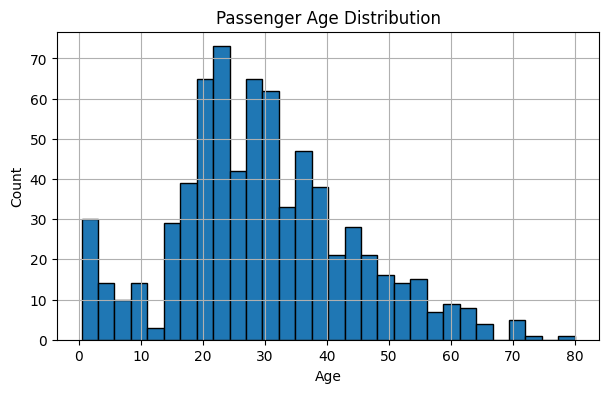

In [29]:
# Visualize the distribution of Age
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
df['Age'].hist(bins=30, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passenger Age Distribution')
plt.show()

In [30]:
# Detect outliers using the IQR (interquartile range) for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df['Fare'] < lower) | (df['Fare'] > upper)]
print('Number of Fare outliers:', outliers.shape[0])

Number of Fare outliers: 116


## Some more examples
# 1. Titanic Dataset - Extreme Fares

Extreme fares (> $300): 3 passengers
         fare  class     sex   age
258  512.3292  First  female  35.0
679  512.3292  First    male  36.0
737  512.3292  First    male  35.0


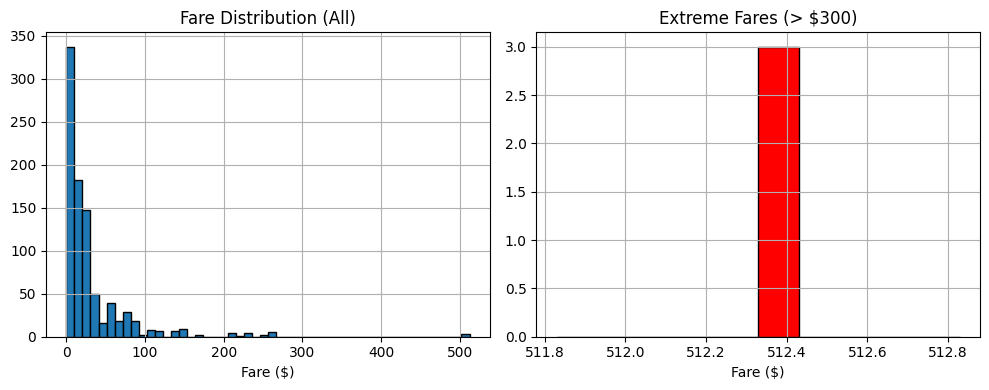


=== Extreme Fare Passengers ===
$512.33 - First class, 35.0 years old, female
$512.33 - First class, 36.0 years old, male
$512.33 - First class, 35.0 years old, male


In [31]:
import seaborn as sns

# Load Titanic data
df = sns.load_dataset('titanic')

# Fare outliers - some passengers paid extremely high fares
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df['fare'].hist(bins=50, edgecolor='black')
plt.title('Fare Distribution (All)')
plt.xlabel('Fare ($)')

plt.subplot(1, 2, 2)
# Focus on the extreme values
extreme_fares = df[df['fare'] > 300]
print(f"Extreme fares (> $300): {len(extreme_fares)} passengers")
print(extreme_fares[['fare', 'class', 'sex', 'age']].sort_values('fare', ascending=False))

extreme_fares['fare'].hist(bins=10, edgecolor='black', color='red')
plt.title('Extreme Fares (> $300)')
plt.xlabel('Fare ($)')

plt.tight_layout()
plt.show()

# Who are these outliers?
print("\n=== Extreme Fare Passengers ===")
for idx, row in extreme_fares.iterrows():
    print(f"${row['fare']:.2f} - {row['class']} class, {row['age']} years old, {row['sex']}")

# 2. Retail Sales - Fraud Detection

Total transactions: 3284
Potential fraud outliers (z-score > 3): 4
Actual fraud cases: 4

=== Alternative Methods ===
Outliers (outside 1st-99th percentile): 66
Outliers (IQR method): 162


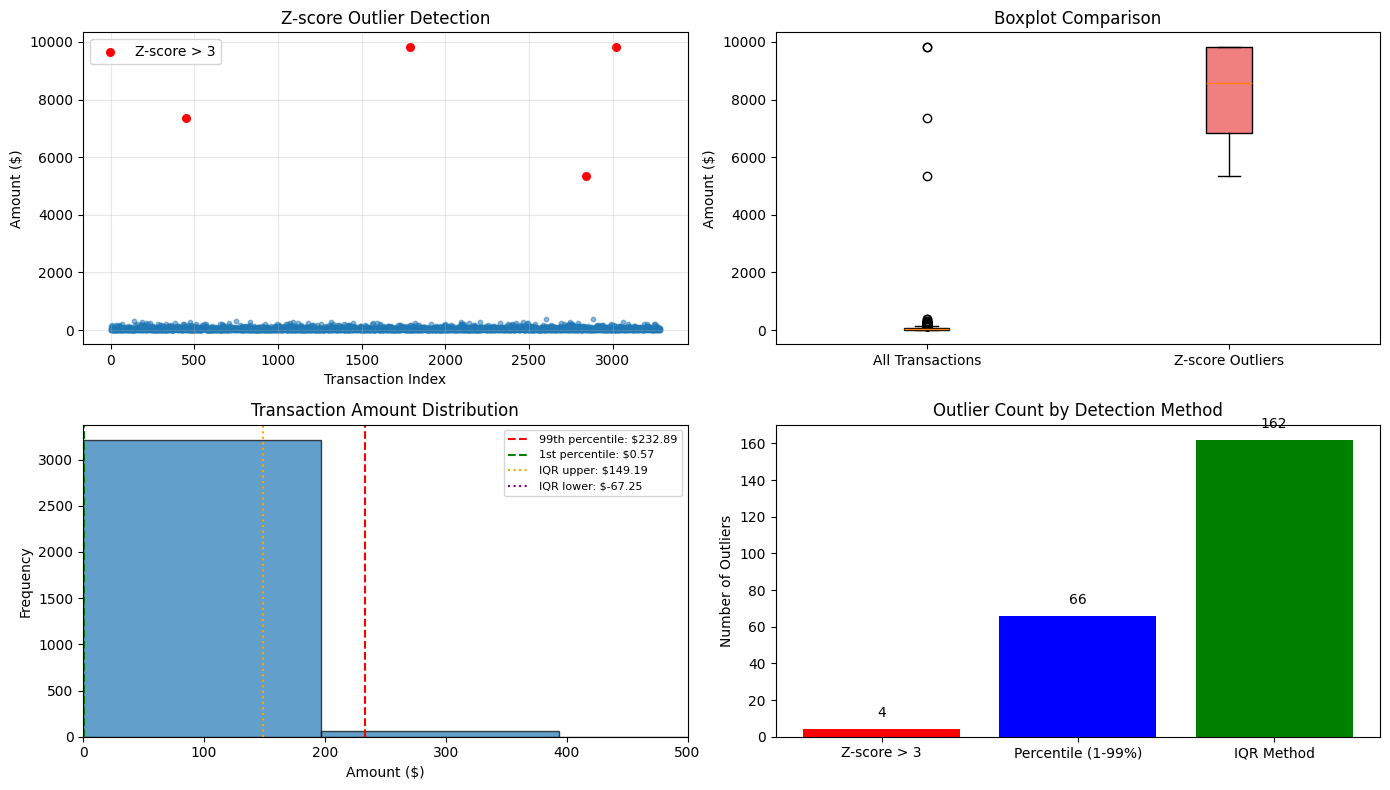


=== Sample Outlier Transactions (Z-score method) ===
           date       amount  is_fraud    z_score
450  2024-01-04  7343.303210      True  24.934118
1787 2024-01-17  9839.300174      True  33.477622
2841 2024-01-27  5345.037963      True  18.094292
3021 2024-01-29  9825.076847      True  33.428937


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate retail transaction data
np.random.seed(42)
dates = pd.date_range('2024-01-01', '2024-01-31', freq='D')
transactions = []

for date in dates:
    # Normal daily transactions
    daily_count = np.random.randint(50, 150)
    for _ in range(daily_count):
        amount = np.random.exponential(scale=50)  # Most transactions $0-200
        transactions.append({
            'date': date,
            'amount': round(amount, 2),
            'is_fraud': False
        })
    
    # Add some outliers (potential fraud)
    if np.random.random() < 0.1:  # 10% chance of fraud per day
        transactions.append({
            'date': date,
            'amount': np.random.uniform(5000, 10000),  # Large amounts
            'is_fraud': True
        })

df_retail = pd.DataFrame(transactions)

# Calculate z-score manually (without scipy)
def calculate_zscore(series):
    """Manual z-score calculation"""
    mean = series.mean()
    std = series.std()
    if std == 0:  # Avoid division by zero
        return pd.Series([0] * len(series), index=series.index)
    return (series - mean) / std

df_retail['z_score'] = np.abs(calculate_zscore(df_retail['amount']))
outliers = df_retail[df_retail['z_score'] > 3]

print(f"Total transactions: {len(df_retail)}")
print(f"Potential fraud outliers (z-score > 3): {len(outliers)}")
print(f"Actual fraud cases: {df_retail['is_fraud'].sum()}")

# Alternative outlier detection without z-score (using percentiles)
print("\n=== Alternative Methods ===")

# Method 1: Percentile-based
p99 = df_retail['amount'].quantile(0.99)
p01 = df_retail['amount'].quantile(0.01)
outliers_percentile = df_retail[
    (df_retail['amount'] > p99) | (df_retail['amount'] < p01)
]
print(f"Outliers (outside 1st-99th percentile): {len(outliers_percentile)}")

# Method 2: IQR-based
Q1 = df_retail['amount'].quantile(0.25)
Q3 = df_retail['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df_retail[
    (df_retail['amount'] < lower_bound) | (df_retail['amount'] > upper_bound)
]
print(f"Outliers (IQR method): {len(outliers_iqr)}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Scatter plot with z-score outliers
axes[0, 0].scatter(df_retail.index, df_retail['amount'], alpha=0.5, s=10)
axes[0, 0].scatter(outliers.index, outliers['amount'], color='red', s=30, label='Z-score > 3')
axes[0, 0].set_title('Z-score Outlier Detection')
axes[0, 0].set_xlabel('Transaction Index')
axes[0, 0].set_ylabel('Amount ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Boxplot comparison
boxes = axes[0, 1].boxplot([df_retail['amount'], outliers['amount']], 
                           labels=['All Transactions', 'Z-score Outliers'],
                           patch_artist=True)
boxes['boxes'][0].set_facecolor('lightblue')
boxes['boxes'][1].set_facecolor('lightcoral')
axes[0, 1].set_title('Boxplot Comparison')
axes[0, 1].set_ylabel('Amount ($)')

# Histogram with thresholds
axes[1, 0].hist(df_retail['amount'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=p99, color='red', linestyle='--', label=f'99th percentile: ${p99:.2f}')
axes[1, 0].axvline(x=p01, color='green', linestyle='--', label=f'1st percentile: ${p01:.2f}')
axes[1, 0].axvline(x=upper_bound, color='orange', linestyle=':', label=f'IQR upper: ${upper_bound:.2f}')
axes[1, 0].axvline(x=lower_bound, color='purple', linestyle=':', label=f'IQR lower: ${lower_bound:.2f}')
axes[1, 0].set_xlabel('Amount ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Transaction Amount Distribution')
axes[1, 0].legend(fontsize=8)
axes[1, 0].set_xlim([0, 500])  # Zoom in to see normal distribution better

# Comparison of methods
methods = ['Z-score > 3', 'Percentile (1-99%)', 'IQR Method']
counts = [len(outliers), len(outliers_percentile), len(outliers_iqr)]
bars = axes[1, 1].bar(methods, counts, color=['red', 'blue', 'green'])
axes[1, 1].set_title('Outlier Count by Detection Method')
axes[1, 1].set_ylabel('Number of Outliers')
for bar, count in zip(bars, counts):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                   str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Show some actual outlier transactions
print("\n=== Sample Outlier Transactions (Z-score method) ===")
print(outliers[['date', 'amount', 'is_fraud', 'z_score']].head(10))

## 3. Healthcare - Medical Test Results

=== Medical Data Outliers ===
Total patients: 100
Patients with outlier BP readings: 5

Outlier details:
    patient_id  age  systolic_bp  diastolic_bp
39          40   47   125.806895     56.964345
96          97   50   190.000000    125.000000
97          98   67   200.000000     45.000000
98          99   34   210.000000    130.000000
99         100   27    85.000000     40.000000


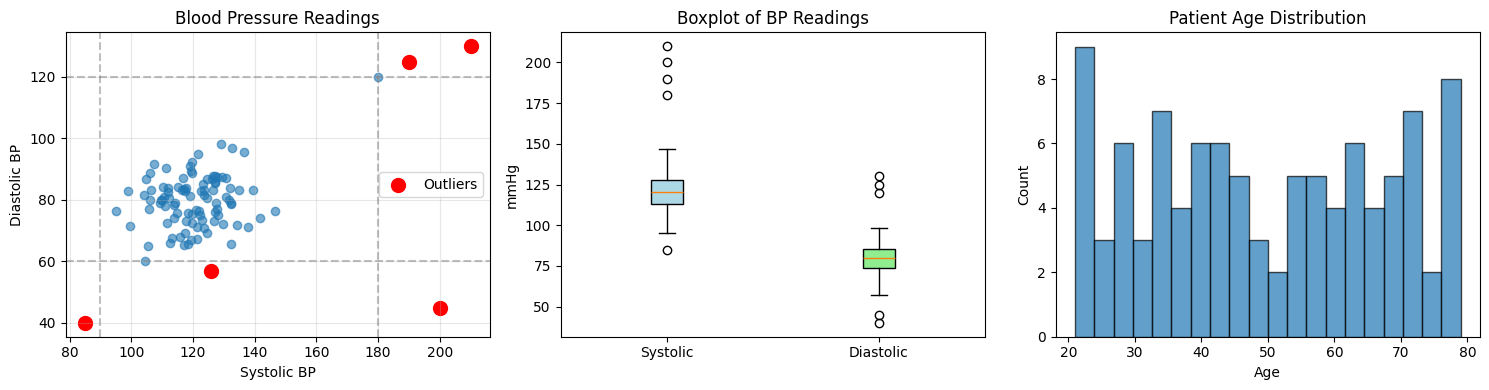

In [35]:
# Medical test results (e.g., blood pressure readings)
np.random.seed(42)
patients = pd.DataFrame({
    'patient_id': range(1, 101),
    'age': np.random.randint(20, 80, 100),
    'systolic_bp': np.concatenate([
        np.random.normal(120, 10, 95),  # Normal range
        np.array([180, 190, 200, 210, 85])  # Outliers: very high and very low
    ]),
    'diastolic_bp': np.concatenate([
        np.random.normal(80, 8, 95),  # Normal range
        np.array([120, 125, 45, 130, 40])  # Outliers
    ])
})

# Define valid ranges (medical knowledge)
valid_ranges = {
    'systolic_bp': (90, 180),  # mmHg
    'diastolic_bp': (60, 120),  # mmHg
    'age': (0, 120)  # years
}

# Find outliers based on medical knowledge
bp_outliers = patients[
    (patients['systolic_bp'] < valid_ranges['systolic_bp'][0]) | 
    (patients['systolic_bp'] > valid_ranges['systolic_bp'][1]) |
    (patients['diastolic_bp'] < valid_ranges['diastolic_bp'][0]) | 
    (patients['diastolic_bp'] > valid_ranges['diastolic_bp'][1])
]

print("=== Medical Data Outliers ===")
print(f"Total patients: {len(patients)}")
print(f"Patients with outlier BP readings: {len(bp_outliers)}")
print("\nOutlier details:")
print(bp_outliers[['patient_id', 'age', 'systolic_bp', 'diastolic_bp']])

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Scatter plot
axes[0].scatter(patients['systolic_bp'], patients['diastolic_bp'], alpha=0.6)
axes[0].scatter(bp_outliers['systolic_bp'], bp_outliers['diastolic_bp'], 
                color='red', s=100, label='Outliers')
axes[0].axhline(y=valid_ranges['diastolic_bp'][0], color='gray', linestyle='--', alpha=0.5)
axes[0].axhline(y=valid_ranges['diastolic_bp'][1], color='gray', linestyle='--', alpha=0.5)
axes[0].axvline(x=valid_ranges['systolic_bp'][0], color='gray', linestyle='--', alpha=0.5)
axes[0].axvline(x=valid_ranges['systolic_bp'][1], color='gray', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Systolic BP')
axes[0].set_ylabel('Diastolic BP')
axes[0].set_title('Blood Pressure Readings')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plots
bp_box_data = [patients['systolic_bp'], patients['diastolic_bp']]
bp_labels = ['Systolic', 'Diastolic']
boxes = axes[1].boxplot(bp_box_data, labels=bp_labels, patch_artist=True)
boxes['boxes'][0].set_facecolor('lightblue')
boxes['boxes'][1].set_facecolor('lightgreen')
axes[1].set_title('Boxplot of BP Readings')
axes[1].set_ylabel('mmHg')

# Age distribution
axes[2].hist(patients['age'], bins=20, edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')
axes[2].set_title('Patient Age Distribution')

plt.tight_layout()
plt.show()

## 4. E-commerce - User Session Duration

In [36]:
# Simulate website session durations
np.random.seed(42)
n_sessions = 1000

# Most sessions are short (exponential distribution)
normal_sessions = np.random.exponential(scale=180, size=int(n_sessions * 0.98))  # 98% normal

# Some outliers (bots, accidental sessions, etc.)
outlier_sessions = np.array([
    0.5,  # Very short (bot?)
    3600,  # 1 hour (deep engagement or forgot to close)
    7200,  # 2 hours
    0.1,   # Very short click
    10800  # 3 hours (extremely long)
])

session_durations = np.concatenate([normal_sessions, outlier_sessions])
df_sessions = pd.DataFrame({'duration_seconds': session_durations})

# Convert to minutes for readability
df_sessions['duration_minutes'] = df_sessions['duration_seconds'] / 60

# Detect outliers using percentiles
p95 = df_sessions['duration_minutes'].quantile(0.95)
p5 = df_sessions['duration_minutes'].quantile(0.05)

outliers = df_sessions[
    (df_sessions['duration_minutes'] > p95) | 
    (df_sessions['duration_minutes'] < p5)
]

print("=== Session Duration Analysis ===")
print(f"Total sessions: {len(df_sessions)}")
print(f"Outlier sessions (outside 5th-95th percentile): {len(outliers)}")
print(f"\nSession duration statistics (minutes):")
print(df_sessions['duration_minutes'].describe())
print(f"\nTop 5 longest sessions (minutes):")
print(df_sessions.nlargest(5, 'duration_minutes')['duration_minutes'].values)
print(f"\nTop 5 shortest sessions (minutes):")
print(df_sessions.nsmallest(5, 'duration_minutes')['duration_minutes'].values)

# Categorize outliers
def categorize_session(duration_min):
    if duration_min < 0.1:
        return "Bot-like (extremely short)"
    elif duration_min < 1:
        return "Bounce (very short)"
    elif duration_min > 60:
        return "Extended engagement"
    elif duration_min > 180:
        return "Extremely long (possible error)"
    else:
        return "Normal"

df_sessions['category'] = df_sessions['duration_minutes'].apply(categorize_session)
category_counts = df_sessions['category'].value_counts()

print("\n=== Session Categories ===")
for category, count in category_counts.items():
    print(f"{category}: {count} sessions ({count/len(df_sessions)*100:.1f}%)")

=== Session Duration Analysis ===
Total sessions: 985
Outlier sessions (outside 5th-95th percentile): 100

Session duration statistics (minutes):
count    985.000000
mean       3.270896
std        7.584756
min        0.001667
25%        0.788285
50%        2.069664
75%        4.111793
max      180.000000
Name: duration_minutes, dtype: float64

Top 5 longest sessions (minutes):
[180.         120.          60.          24.51733679  17.30424485]

Top 5 shortest sessions (minutes):
[0.00166667 0.00833333 0.01392835 0.01522331 0.01661226]

=== Session Categories ===
Normal: 684 sessions (69.4%)
Bounce (very short): 262 sessions (26.6%)
Bot-like (extremely short): 37 sessions (3.8%)
Extended engagement: 2 sessions (0.2%)


## 5. Financial - Stock Price Anomalies

Number of business days: 65
Anomaly indices: [12, 32, 51]
Anomaly dates: [Timestamp('2024-01-17 00:00:00'), Timestamp('2024-02-14 00:00:00'), Timestamp('2024-03-12 00:00:00')]

=== Stock Price Anomalies ===
Total trading days: 65
Days with anomalous returns (z-score > 3): 4

Detected anomalous trading days:
2024-01-17: Price $141.05, Return: 28.9%
2024-02-15: Price $94.11, Return: 33.4%
2024-03-12: Price $117.30, Return: 41.0%
2024-03-13: Price $83.22, Return: -29.1%

=== Injected Anomalies (Ground Truth) ===
Day 12 (2024-01-17): Injected +30.0% change
Day 32 (2024-02-14): Injected -25.0% change
Day 51 (2024-03-12): Injected +40.0% change


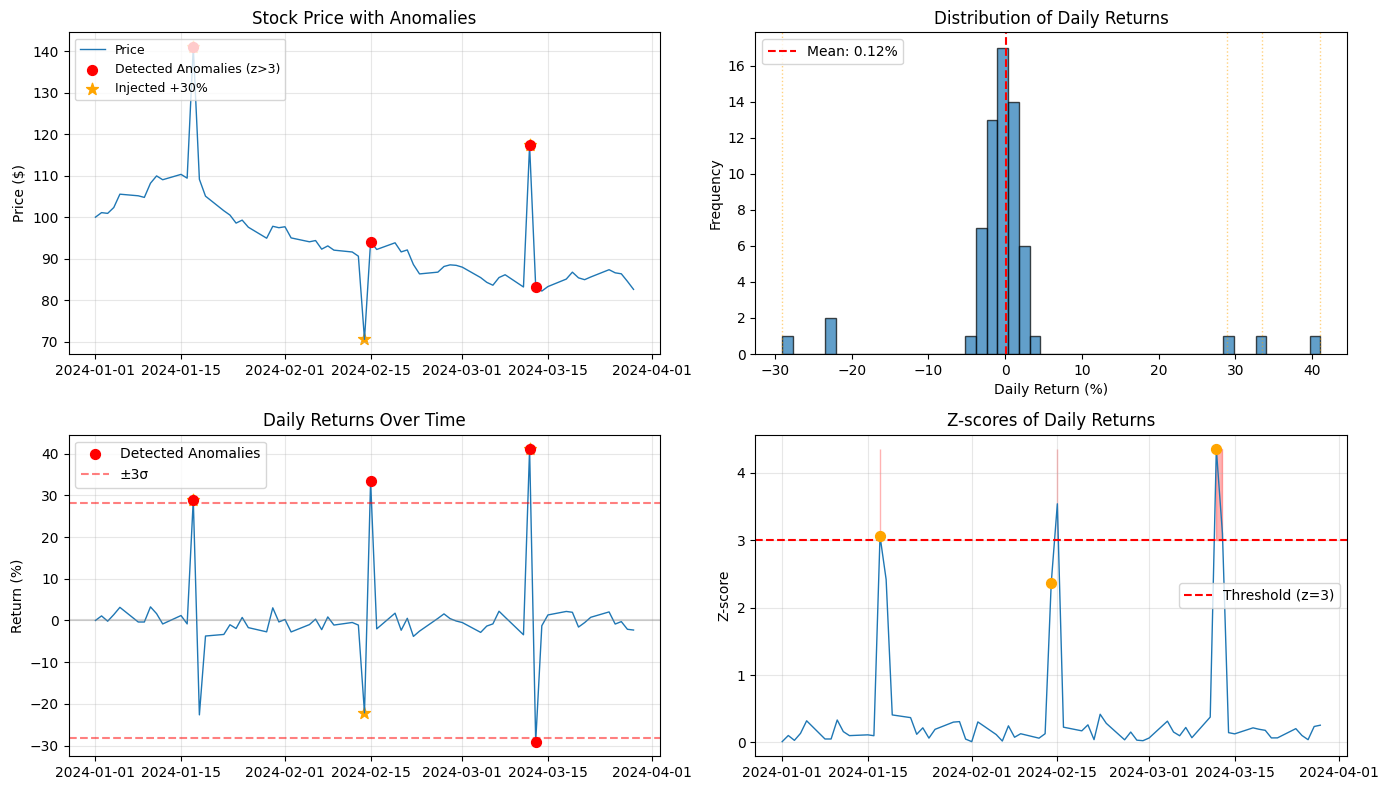


=== Anomaly Detection Performance ===
Injected anomalies: 3
Correctly detected: 2
Detection rate: 66.7%
False positives: 2
False positive rate: 50.0%

=== Stock Statistics ===
Starting price: $100.00
Ending price: $82.58
Total return: -17.4%
Average daily return: 0.120%
Daily return volatility (std): 9.42%


In [41]:
# 5. Financial - Stock Price Anomalies


# Simulate stock price data with anomalies
np.random.seed(42)
dates = pd.date_range('2024-01-01', '2024-03-31', freq='B')  # Business days
n_days = len(dates)
print(f"Number of business days: {n_days}")  # Debug: Check actual number of days

# Generate normal stock prices with random walk
normal_prices = [100]  # Start at $100
for i in range(1, n_days):
    # Daily return ~ N(0.001, 0.02) - mean 0.1%, std 2%
    daily_return = np.random.normal(0.001, 0.02)
    new_price = normal_prices[-1] * (1 + daily_return)
    normal_prices.append(new_price)

# Add some anomalies - use percentages of total days instead of fixed indices
# Choose anomaly days at 20%, 50%, and 80% of the time period
anomaly_positions = [0.2, 0.5, 0.8]  # 20%, 50%, 80% through the period
anomaly_indices = [int(pos * (n_days - 1)) for pos in anomaly_positions]
anomaly_magnitudes = [0.3, -0.25, 0.4]  # +30%, -25%, +40%

print(f"Anomaly indices: {anomaly_indices}")
print(f"Anomaly dates: {[dates[idx] for idx in anomaly_indices]}")

prices = np.array(normal_prices)
for idx, magnitude in zip(anomaly_indices, anomaly_magnitudes):
    if idx < len(prices):  # Safety check
        prices[idx] = prices[idx] * (1 + magnitude)

df_stock = pd.DataFrame({
    'date': dates,
    'price': prices,
    'daily_return': np.concatenate([[0], np.diff(prices) / prices[:-1]])
})

# Manual z-score calculation (no scipy needed)
def calculate_zscore(series):
    """Manual z-score calculation"""
    mean = series.mean()
    std = series.std()
    if std == 0:  # Avoid division by zero
        return pd.Series([0] * len(series), index=series.index)
    return (series - mean) / std

# Detect anomalies in returns
df_stock['return_zscore'] = np.abs(calculate_zscore(df_stock['daily_return']))
price_outliers = df_stock[df_stock['return_zscore'] > 3]

print("\n=== Stock Price Anomalies ===")
print(f"Total trading days: {len(df_stock)}")
print(f"Days with anomalous returns (z-score > 3): {len(price_outliers)}")

if len(price_outliers) > 0:
    print("\nDetected anomalous trading days:")
    for idx, row in price_outliers.iterrows():
        print(f"{row['date'].date()}: Price ${row['price']:.2f}, Return: {row['daily_return']*100:.1f}%")

print("\n=== Injected Anomalies (Ground Truth) ===")
for idx, magnitude in zip(anomaly_indices, anomaly_magnitudes):
    if idx < len(df_stock):
        print(f"Day {idx} ({dates[idx].date()}): Injected {magnitude*100:+.1f}% change")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Price chart
axes[0, 0].plot(df_stock['date'], df_stock['price'], linewidth=1, label='Price')
axes[0, 0].scatter(price_outliers['date'], price_outliers['price'], 
                   color='red', s=50, zorder=5, label='Detected Anomalies (z>3)')
# Mark injected anomalies
for idx, magnitude in zip(anomaly_indices, anomaly_magnitudes):
    if idx < len(df_stock):
        axes[0, 0].scatter(dates[idx], prices[idx], 
                          color='orange', s=80, marker='*', 
                          label=f'Injected {magnitude*100:+.0f}%' if idx == anomaly_indices[0] else "")
axes[0, 0].set_title('Stock Price with Anomalies')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend(loc='upper left', fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# Returns distribution
axes[0, 1].hist(df_stock['daily_return'] * 100, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=df_stock['daily_return'].mean() * 100, color='red', 
                   linestyle='--', label=f'Mean: {df_stock["daily_return"].mean()*100:.2f}%')
# Mark outliers
for ret in price_outliers['daily_return'] * 100:
    axes[0, 1].axvline(x=ret, color='orange', linestyle=':', alpha=0.5, linewidth=1)
axes[0, 1].set_xlabel('Daily Return (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Daily Returns')
axes[0, 1].legend()

# Returns over time
axes[1, 0].plot(df_stock['date'], df_stock['daily_return'] * 100, linewidth=1)
axes[1, 0].scatter(price_outliers['date'], price_outliers['daily_return'] * 100,
                   color='red', s=50, zorder=5, label='Detected Anomalies')
# Mark injected anomalies
for idx, magnitude in zip(anomaly_indices, anomaly_magnitudes):
    if idx < len(df_stock):
        axes[1, 0].scatter(dates[idx], df_stock.iloc[idx]['daily_return'] * 100,
                          color='orange', s=80, marker='*')
axes[1, 0].axhline(y=0, color='gray', linestyle='-', alpha=0.3)
axes[1, 0].axhline(y=3*df_stock['daily_return'].std()*100, color='red', linestyle='--', alpha=0.5, label='±3σ')
axes[1, 0].axhline(y=-3*df_stock['daily_return'].std()*100, color='red', linestyle='--', alpha=0.5)
axes[1, 0].set_title('Daily Returns Over Time')
axes[1, 0].set_ylabel('Return (%)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Z-scores
axes[1, 1].plot(df_stock['date'], df_stock['return_zscore'], linewidth=1)
axes[1, 1].axhline(y=3, color='red', linestyle='--', label='Threshold (z=3)')
axes[1, 1].fill_between(df_stock['date'], 3, df_stock['return_zscore'].max(),
                        where=df_stock['return_zscore'] > 3, color='red', alpha=0.3)
# Mark injected anomalies
for idx in anomaly_indices:
    if idx < len(df_stock):
        axes[1, 1].scatter(dates[idx], df_stock.iloc[idx]['return_zscore'],
                          color='orange', s=50, zorder=5)
axes[1, 1].set_title('Z-scores of Daily Returns')
axes[1, 1].set_ylabel('Z-score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Performance evaluation
print("\n=== Anomaly Detection Performance ===")
detected_injected = 0
for idx in anomaly_indices:
    if idx < len(df_stock) and df_stock.iloc[idx]['return_zscore'] > 3:
        detected_injected += 1

print(f"Injected anomalies: {len(anomaly_indices)}")
print(f"Correctly detected: {detected_injected}")
if len(anomaly_indices) > 0:
    print(f"Detection rate: {detected_injected/len(anomaly_indices)*100:.1f}%")

false_positives = len(price_outliers) - detected_injected
print(f"False positives: {false_positives}")
if len(price_outliers) > 0:
    print(f"False positive rate: {false_positives/len(price_outliers)*100:.1f}%")

# Show some statistics
print("\n=== Stock Statistics ===")
print(f"Starting price: ${df_stock['price'].iloc[0]:.2f}")
print(f"Ending price: ${df_stock['price'].iloc[-1]:.2f}")
print(f"Total return: {(df_stock['price'].iloc[-1]/df_stock['price'].iloc[0]-1)*100:.1f}%")
print(f"Average daily return: {df_stock['daily_return'].mean()*100:.3f}%")
print(f"Daily return volatility (std): {df_stock['daily_return'].std()*100:.2f}%")

## check for duplicate rows


In [42]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print('Number of duplicate rows:', duplicates)

Number of duplicate rows: 107


## Example 1: Basic Duplicate Detection in Customer Data

In [43]:
# Create sample customer data with duplicates
data = {
    'customer_id': [101, 102, 103, 101, 104, 102, 105],
    'name': ['Alice', 'Bob', 'Charlie', 'Alice', 'David', 'Bob', 'Eve'],
    'email': ['alice@email.com', 'bob@email.com', 'charlie@email.com', 
              'alice@email.com', 'david@email.com', 'bob@email.com', 'eve@email.com'],
    'purchase_amount': [100, 150, 200, 100, 300, 150, 250],
    'purchase_date': ['2024-01-01', '2024-01-02', '2024-01-03',
                     '2024-01-01', '2024-01-04', '2024-01-02', '2024-01-05']
}

df = pd.DataFrame(data)
print("=== Original Data with Duplicates ===")
print(df)

# Identify duplicates based on ALL columns
all_dupes = df[df.duplicated(keep=False)]  # keep=False marks all duplicates
print("\n=== All Duplicate Rows (all columns match) ===")
print(all_dupes)

# Identify duplicates based on specific columns
email_dupes = df[df.duplicated(subset=['email'], keep=False)]
print("\n=== Duplicate Rows (by email) ===")
print(email_dupes)

# Show which rows are considered first occurrences vs duplicates
df['is_duplicate_all'] = df.duplicated()
df['is_duplicate_email'] = df.duplicated(subset=['email'])
print("\n=== Marking Duplicates ===")
print(df[['customer_id', 'name', 'email', 'is_duplicate_all', 'is_duplicate_email']])

# Benefits: Prevents double-counting customers in analytics

=== Original Data with Duplicates ===
   customer_id     name              email  purchase_amount purchase_date
0          101    Alice    alice@email.com              100    2024-01-01
1          102      Bob      bob@email.com              150    2024-01-02
2          103  Charlie  charlie@email.com              200    2024-01-03
3          101    Alice    alice@email.com              100    2024-01-01
4          104    David    david@email.com              300    2024-01-04
5          102      Bob      bob@email.com              150    2024-01-02
6          105      Eve      eve@email.com              250    2024-01-05

=== All Duplicate Rows (all columns match) ===
   customer_id   name            email  purchase_amount purchase_date
0          101  Alice  alice@email.com              100    2024-01-01
1          102    Bob    bob@email.com              150    2024-01-02
3          101  Alice  alice@email.com              100    2024-01-01
5          102    Bob    bob@email.com    

## Example 2: Sales Transaction Duplicates

In [44]:
# Create sales data with various types of duplicates
np.random.seed(42)
transactions = []

# Generate some normal transactions
for i in range(20):
    transactions.append({
        'transaction_id': f'TX{i:04d}',
        'customer_id': np.random.randint(1000, 1010),
        'product_id': np.random.choice(['P001', 'P002', 'P003', 'P004']),
        'quantity': np.random.randint(1, 3),
        'amount': round(np.random.uniform(10, 100), 2),
        'timestamp': f'2024-01-{15 + i//5:02d} {10 + i%5:02d}:00:00'
    })

# Add some exact duplicates (system error)
transactions.extend(transactions[0:2])  # Duplicate first 2 transactions

# Add some near duplicates (different timestamps but same data)
transactions.append({
    'transaction_id': 'TX0019',
    'customer_id': 1005,
    'product_id': 'P002',
    'quantity': 2,
    'amount': 45.50,
    'timestamp': '2024-01-19 11:00:00'  # Different timestamp
})
transactions.append({
    'transaction_id': 'TX0020',
    'customer_id': 1005,
    'product_id': 'P002',
    'quantity': 2,
    'amount': 45.50,
    'timestamp': '2024-01-19 11:05:00'  # Slightly different timestamp
})

df_sales = pd.DataFrame(transactions)
print("=== Sales Transactions (with duplicates) ===")
print(df_sales.head(10))

# Method 1: Remove exact duplicates (all columns match)
df_no_exact_dupes = df_sales.drop_duplicates()
print(f"\nOriginal rows: {len(df_sales)}")
print(f"After removing exact duplicates: {len(df_no_exact_dupes)}")

# Method 2: Remove duplicates based on transaction logic
# (Same customer, product, quantity, amount on same day = duplicate)
df_sales['date'] = pd.to_datetime(df_sales['timestamp']).dt.date
business_duplicates = df_sales.duplicated(
    subset=['customer_id', 'product_id', 'quantity', 'amount', 'date'], 
    keep='first'
)
print(f"\nBusiness logic duplicates found: {business_duplicates.sum()}")

# Benefits: Prevents revenue overstatement, maintains data integrity

=== Sales Transactions (with duplicates) ===
  transaction_id  customer_id product_id  quantity  amount  \
0         TX0000         1006       P004         1   26.51   
1         TX0001         1007       P001         1   24.04   
2         TX0002         1002       P003         1   51.33   
3         TX0003         1004       P004         2   73.73   
4         TX0004         1005       P001         2   74.98   
5         TX0005         1005       P002         2   99.30   
6         TX0006         1000       P004         2   57.23   
7         TX0007         1008       P001         1   65.07   
8         TX0008         1009       P004         2   97.64   
9         TX0009         1002       P004         1   98.49   

             timestamp  
0  2024-01-15 10:00:00  
1  2024-01-15 11:00:00  
2  2024-01-15 12:00:00  
3  2024-01-15 13:00:00  
4  2024-01-15 14:00:00  
5  2024-01-16 10:00:00  
6  2024-01-16 11:00:00  
7  2024-01-16 12:00:00  
8  2024-01-16 13:00:00  
9  2024-01-16 14:00:00

## Example 3: Survey Data with Multiple Submissions

In [45]:
# Create survey response data
survey_data = {
    'respondent_id': [1, 2, 3, 1, 4, 2, 5, 3, 6],
    'email': ['a@test.com', 'b@test.com', 'c@test.com', 'a@test.com',
              'd@test.com', 'b@test.com', 'e@test.com', 'c@test.com', 'f@test.com'],
    'age': [25, 30, 35, 25, 40, 30, 45, 35, 28],
    'satisfaction_score': [4, 5, 3, 4, 2, 5, 4, 3, 5],
    'submission_time': ['09:00', '09:15', '09:30', '14:00', '10:00', 
                       '16:00', '11:00', '15:30', '12:00'],
    'ip_address': ['192.168.1.1', '192.168.1.2', '192.168.1.3', 
                  '192.168.1.100', '192.168.1.4', '192.168.1.2',
                  '192.168.1.5', '192.168.1.3', '192.168.1.6']
}

df_survey = pd.DataFrame(survey_data)
print("=== Survey Data ===")
print(df_survey)

# Different strategies for handling duplicates
print("\n=== Duplicate Handling Strategies ===")

# Strategy 1: Keep first response
df_first = df_survey.drop_duplicates(subset=['email'], keep='first')
print("Strategy 1: Keep first response (common for surveys)")
print(f"Responses: {len(df_survey)} -> {len(df_first)}")

# Strategy 2: Keep last response (if people can update)
df_last = df_survey.drop_duplicates(subset=['email'], keep='last')
print("\nStrategy 2: Keep last response (allows updates)")
print(f"Responses: {len(df_survey)} -> {len(df_last)}")

# Strategy 3: Flag suspicious submissions (same IP, different times)
df_survey['is_suspicious'] = df_survey.duplicated(subset=['ip_address', 'age', 'satisfaction_score'], keep=False)
print("\nStrategy 3: Flag suspicious submissions")
print(df_survey[['email', 'ip_address', 'submission_time', 'is_suspicious']])

# Benefits: Ensures survey accuracy, prevents ballot stuffing

=== Survey Data ===
   respondent_id       email  age  satisfaction_score submission_time  \
0              1  a@test.com   25                   4           09:00   
1              2  b@test.com   30                   5           09:15   
2              3  c@test.com   35                   3           09:30   
3              1  a@test.com   25                   4           14:00   
4              4  d@test.com   40                   2           10:00   
5              2  b@test.com   30                   5           16:00   
6              5  e@test.com   45                   4           11:00   
7              3  c@test.com   35                   3           15:30   
8              6  f@test.com   28                   5           12:00   

      ip_address  
0    192.168.1.1  
1    192.168.1.2  
2    192.168.1.3  
3  192.168.1.100  
4    192.168.1.4  
5    192.168.1.2  
6    192.168.1.5  
7    192.168.1.3  
8    192.168.1.6  

=== Duplicate Handling Strategies ===
Strategy 1: Keep fir

## Example 4: E-commerce Product Catalog

In [46]:
# Product catalog with variations and duplicates
products = pd.DataFrame({
    'product_id': ['P001', 'P002', 'P003', 'P001', 'P004', 'P002', 'P005'],
    'product_name': ['Laptop', 'Mouse', 'Keyboard', 'Laptop Pro', 
                    'Monitor', 'Wireless Mouse', 'Headphones'],
    'sku': ['LP-001', 'MS-001', 'KB-001', 'LP-001', 'MN-001', 'MS-001', 'HP-001'],
    'price': [999.99, 29.99, 79.99, 999.99, 299.99, 39.99, 149.99],
    'category': ['Electronics', 'Accessories', 'Accessories', 
                'Electronics', 'Electronics', 'Accessories', 'Audio'],
    'supplier': ['Supplier_A', 'Supplier_B', 'Supplier_C', 
                'Supplier_A', 'Supplier_D', 'Supplier_B', 'Supplier_E']
})

print("=== Product Catalog ===")
print(products)

# Problem: Same SKU but different product names
sku_dupes = products[products.duplicated(subset=['sku'], keep=False)]
print("\n=== SKU Duplicates (Serious Data Issue) ===")
print(sku_dupes)

# Resolution strategies
print("\n=== Resolution Strategies ===")

# Strategy A: Keep cheapest price
products['rank_by_price'] = products.groupby('sku')['price'].rank(method='first')
cheapest_products = products[products['rank_by_price'] == 1]
print("Strategy A: Keep cheapest version of each SKU")
print(cheapest_products)

# Strategy B: Manual review needed
print("\nStrategy B: Flag for manual review")
products['needs_review'] = products.duplicated(subset=['sku'], keep=False)
review_needed = products[products['needs_review']]
print(review_needed[['sku', 'product_name', 'price', 'supplier']])

# Benefits: Prevents pricing errors, maintains catalog consistency

=== Product Catalog ===
  product_id    product_name     sku   price     category    supplier
0       P001          Laptop  LP-001  999.99  Electronics  Supplier_A
1       P002           Mouse  MS-001   29.99  Accessories  Supplier_B
2       P003        Keyboard  KB-001   79.99  Accessories  Supplier_C
3       P001      Laptop Pro  LP-001  999.99  Electronics  Supplier_A
4       P004         Monitor  MN-001  299.99  Electronics  Supplier_D
5       P002  Wireless Mouse  MS-001   39.99  Accessories  Supplier_B
6       P005      Headphones  HP-001  149.99        Audio  Supplier_E

=== SKU Duplicates (Serious Data Issue) ===
  product_id    product_name     sku   price     category    supplier
0       P001          Laptop  LP-001  999.99  Electronics  Supplier_A
1       P002           Mouse  MS-001   29.99  Accessories  Supplier_B
3       P001      Laptop Pro  LP-001  999.99  Electronics  Supplier_A
5       P002  Wireless Mouse  MS-001   39.99  Accessories  Supplier_B

=== Resolution Strat

## Example 5: Healthcare Patient Records

In [47]:
# Patient records with potential duplicates
patients = pd.DataFrame({
    'record_id': ['R001', 'R002', 'R003', 'R004', 'R005', 'R006', 'R007'],
    'first_name': ['John', 'Jon', 'John', 'Jane', 'Janie', 'Robert', 'Bob'],
    'last_name': ['Smith', 'Smith', 'Smyth', 'Doe', 'Doe', 'Johnson', 'Johnson'],
    'dob': ['1980-05-15', '1980-05-15', '1980-05-15', '1990-08-20', 
           '1990-08-20', '1975-12-10', '1975-12-10'],
    'ssn': ['123-45-6789', '123-45-6789', '123-45-6789', '987-65-4321',
           '987-65-4321', '456-78-9012', '456-78-9012'],
    'phone': ['555-0101', '555-0101', '555-0202', '555-0303', 
             '555-0303', '555-0404', '555-0404'],
    'last_visit': ['2024-01-01', '2024-01-15', '2024-02-01', '2024-01-10',
                  '2024-01-20', '2024-01-05', '2024-01-25']
})

print("=== Patient Records ===")
print(patients)

# Fuzzy duplicate detection (similar but not exact)
print("\n=== Potential Patient Duplicates ===")

# Method 1: Exact match on SSN (most reliable)
ssn_dupes = patients[patients.duplicated(subset=['ssn'], keep=False)]
print("Exact SSN matches:")
print(ssn_dupes[['first_name', 'last_name', 'dob', 'ssn']])

# Method 2: Similar names and DOB
patients['name_dob_key'] = patients['first_name'].str.lower().str[:3] + '_' + \
                          patients['last_name'].str.lower().str[:3] + '_' + \
                          patients['dob']
name_dob_dupes = patients[patients.duplicated(subset=['name_dob_key'], keep=False)]
print("\nSimilar name and DOB matches:")
print(name_dob_dupes[['first_name', 'last_name', 'dob', 'name_dob_key']])

# Strategy: Merge duplicates, keep most recent visit
patients['last_visit_date'] = pd.to_datetime(patients['last_visit'])
patients['is_most_recent'] = patients.groupby('ssn')['last_visit_date'].rank(ascending=False) == 1
clean_patients = patients[patients['is_most_recent']].copy()

print(f"\nOriginal records: {len(patients)}")
print(f"After merging duplicates: {len(clean_patients)}")

# Benefits: Prevents medical errors, ensures complete patient history

=== Patient Records ===
  record_id first_name last_name         dob          ssn     phone  \
0      R001       John     Smith  1980-05-15  123-45-6789  555-0101   
1      R002        Jon     Smith  1980-05-15  123-45-6789  555-0101   
2      R003       John     Smyth  1980-05-15  123-45-6789  555-0202   
3      R004       Jane       Doe  1990-08-20  987-65-4321  555-0303   
4      R005      Janie       Doe  1990-08-20  987-65-4321  555-0303   
5      R006     Robert   Johnson  1975-12-10  456-78-9012  555-0404   
6      R007        Bob   Johnson  1975-12-10  456-78-9012  555-0404   

   last_visit  
0  2024-01-01  
1  2024-01-15  
2  2024-02-01  
3  2024-01-10  
4  2024-01-20  
5  2024-01-05  
6  2024-01-25  

=== Potential Patient Duplicates ===
Exact SSN matches:
  first_name last_name         dob          ssn
0       John     Smith  1980-05-15  123-45-6789
1        Jon     Smith  1980-05-15  123-45-6789
2       John     Smyth  1980-05-15  123-45-6789
3       Jane       Doe  1990-0

# Practical Guide to Cleaning Real-World Datasets
- downloading, inspecting, cleaning and analyzing titatic dataset
- fix data types, remove duplicates, missing values, remove duplicates, unique values 

Dataset shape: (891, 15)

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Column names:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Data types:
survi

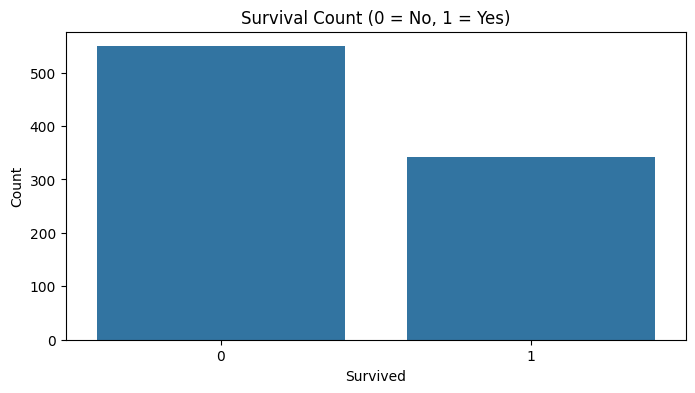

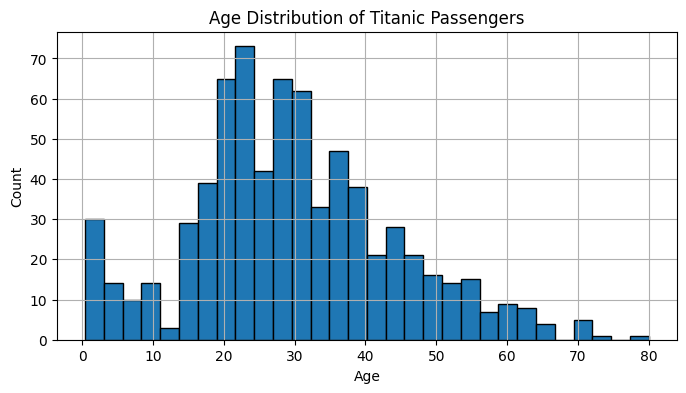

In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Display basic information
print("Dataset shape:", titanic.shape)
print("\nFirst 5 rows:")
print(titanic.head())

print("\nColumn names:")
print(titanic.columns.tolist())

print("\nData types:")
print(titanic.dtypes)

print("\nBasic statistics:")
print(titanic.describe())

# Optional: Check for missing values
print("\nMissing values per column:")
print(titanic.isnull().sum())

# Optional: Quick visualization of survival rate
plt.figure(figsize=(8, 4))
sns.countplot(data=titanic, x='survived')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Show distribution of ages
plt.figure(figsize=(8, 4))
titanic['age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Look for unique values

=== UNIQUE VALUES IN TITANIC DATASET ===
Dataset shape: (891, 15)

Column: 'survived'
  Data type: int64
  Unique values: 2
  Values: [np.int64(0), np.int64(1)]
--------------------------------------------------
Column: 'pclass'
  Data type: int64
  Unique values: 3
  Values: [np.int64(1), np.int64(2), np.int64(3)]
--------------------------------------------------
Column: 'sex'
  Data type: object
  Unique values: 2
  Values: ['female', 'male']
  Value counts:
    male: 577 (64.8%)
    female: 314 (35.2%)
--------------------------------------------------
Column: 'age'
  Data type: float64
  Unique values: 88
  Sample values: [np.float64(2.0), np.float64(4.0), np.float64(14.0), np.float64(22.0), np.float64(26.0), np.float64(27.0), np.float64(35.0), np.float64(38.0), np.float64(54.0)] ...
--------------------------------------------------
Column: 'sibsp'
  Data type: int64
  Unique values: 7
  Values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int

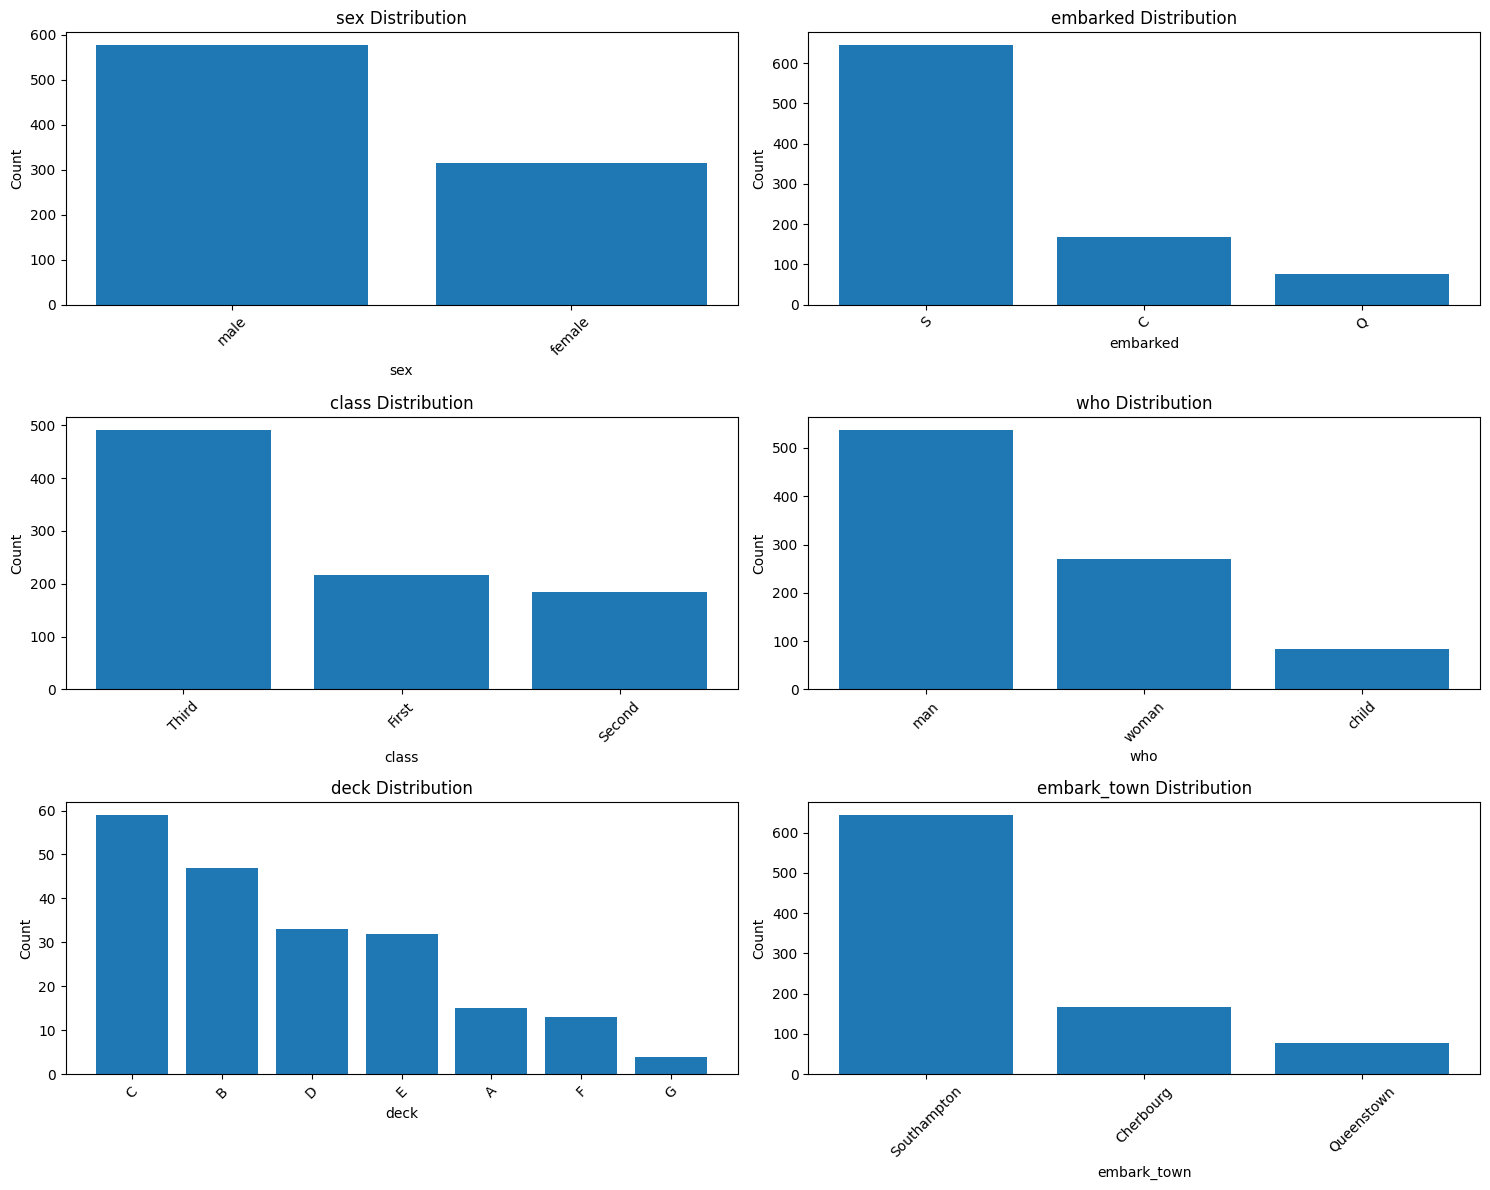

In [49]:
# Look for unique values in Titanic dataset
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

print("=== UNIQUE VALUES IN TITANIC DATASET ===")
print(f"Dataset shape: {titanic.shape}\n")

# Loop through each column and show unique values
for column in titanic.columns:
    unique_count = titanic[column].nunique()
    unique_values = titanic[column].unique()
    
    print(f"Column: '{column}'")
    print(f"  Data type: {titanic[column].dtype}")
    print(f"  Unique values: {unique_count}")
    
    if unique_count <= 10:  # Show all values if 10 or fewer
        print(f"  Values: {sorted([val for val in unique_values if pd.notna(val)])}")
    else:  # Show sample if many unique values
        print(f"  Sample values: {sorted([val for val in unique_values[:10] if pd.notna(val)])} ...")
    
    # For categorical/object columns with few unique values
    if titanic[column].dtype in ['object', 'category'] and unique_count <= 20:
        value_counts = titanic[column].value_counts(dropna=False)
        print(f"  Value counts:")
        for val, count in value_counts.items():
            percentage = (count / len(titanic)) * 100
            print(f"    {val}: {count} ({percentage:.1f}%)")
    
    print("-" * 50)

# Special analysis for key columns
print("\n=== DETAILED ANALYSIS OF KEY COLUMNS ===")

# 1. Survived column (binary)
print("\n1. SURVIVED (Target Variable):")
survival_counts = titanic['survived'].value_counts()
for val, count in survival_counts.items():
    percentage = (count / len(titanic)) * 100
    label = "Survived" if val == 1 else "Did not survive"
    print(f"   {label}: {count} passengers ({percentage:.1f}%)")

# 2. Passenger Class
print("\n2. PASSENGER CLASS:")
class_mapping = {1: "First Class", 2: "Second Class", 3: "Third Class"}
for class_num in sorted(titanic['pclass'].unique()):
    if pd.notna(class_num):
        count = (titanic['pclass'] == class_num).sum()
        percentage = (count / len(titanic)) * 100
        print(f"   {class_mapping.get(class_num, f'Class {class_num}')}: {count} passengers ({percentage:.1f}%)")

# 3. Gender
print("\n3. GENDER:")
for gender in sorted(titanic['sex'].dropna().unique()):
    count = (titanic['sex'] == gender).sum()
    percentage = (count / len(titanic)) * 100
    print(f"   {gender}: {count} passengers ({percentage:.1f}%)")

# 4. Embarkation Port
print("\n4. EMBARKATION PORT:")
port_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
for port_code in sorted(titanic['embarked'].dropna().unique()):
    count = (titanic['embarked'] == port_code).sum()
    percentage = (count / len(titanic)) * 100
    port_name = port_mapping.get(port_code, port_code)
    print(f"   {port_name} ({port_code}): {count} passengers ({percentage:.1f}%)")

# 5. Age ranges (binned)
print("\n5. AGE DISTRIBUTION (Binned):")
age_bins = [0, 12, 18, 30, 50, 100]
age_labels = ['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-30)', 
              'Adult (31-50)', 'Senior (51+)']
titanic['age_group'] = pd.cut(titanic['age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = titanic['age_group'].value_counts().sort_index()
for group, count in age_group_counts.items():
    if pd.notna(group):
        percentage = (count / len(titanic)) * 100
        print(f"   {group}: {count} passengers ({percentage:.1f}%)")

# 6. Missing values summary
print("\n=== MISSING VALUES SUMMARY ===")
missing_values = titanic.isnull().sum()
missing_percentage = (missing_values / len(titanic)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])

# 7. Numerical columns statistics
print("\n=== NUMERICAL COLUMNS STATISTICS ===")
numerical_cols = titanic.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print(f"  Min: {titanic[col].min():.2f}")
    print(f"  Max: {titanic[col].max():.2f}")
    print(f"  Mean: {titanic[col].mean():.2f}")
    print(f"  Median: {titanic[col].median():.2f}")
    print(f"  Std Dev: {titanic[col].std():.2f}")

# Create a summary dataframe of unique values
print("\n=== SUMMARY DATAFRAME ===")
summary_data = []
for column in titanic.columns:
    summary_data.append({
        'Column': column,
        'Data Type': str(titanic[column].dtype),
        'Unique Values': titanic[column].nunique(),
        'Missing Values': titanic[column].isnull().sum(),
        'Missing %': (titanic[column].isnull().sum() / len(titanic)) * 100
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string())

# Export unique values to CSV for reference
print("\n=== EXPORTING TO CSV ===")
unique_values_dict = {}
for column in titanic.columns:
    if titanic[column].nunique() <= 50:  # Only export if reasonable number of values
        unique_values_dict[column] = list(titanic[column].dropna().unique())
    
# Create a DataFrame from dictionary (transposed for readability)
unique_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values_dict.items()]))
unique_df.to_csv('titanic_unique_values.csv', index=False)
print("Unique values exported to 'titanic_unique_values.csv'")

# Quick visualization of categorical columns
print("\n=== CATEGORICAL COLUMNS VISUALIZATION ===")
categorical_cols = titanic.select_dtypes(include=['object', 'category']).columns

import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols[:6]):  # First 6 categorical columns
    if idx < len(axes):
        value_counts = titanic[col].value_counts()
        axes[idx].bar(value_counts.index.astype(str), value_counts.values)
        axes[idx].set_title(f'{col} Distribution')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()